In [ ]:
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.132
DistanceFromHome,0.084
Age_Years,0.080
EmployeeNumber,0.078
TotalWorkingYears,0.077
YearsInCurrentRole,0.056
JobRole,0.054
YearsAtCompany,0.049
PercentSalaryHike,0.046


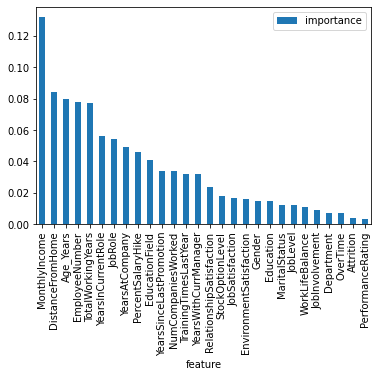

In [ ]:
importances.plot.bar()


In [49]:
df = pd.read_csv('/content/final_dataset.csv') 
df.head()

,Unnamed: 0,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,4,27,No,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [51]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])
        #df[column] = OneHotEncoder().fit_transform(df[column])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


In [52]:
#Create a new column at the end of the dataframe that contains the same value 
df['Attrition1'] = df['Attrition']
#Remove the first column called age 
df = df.drop('Attrition', axis = 1)
#Show the dataframe
col=df['Attrition1']
df.rename( columns = {'Attrition1':'Attrition'}, inplace = False)

,Unnamed: 0,Age,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,23,2,0,1,1,0,1,0,2,1,7,3,2,809,8,1,0,0,0,0,8,0,0,6,4,0,5,1
1,1,31,1,7,0,1,1,2,1,1,1,6,1,1,682,1,0,12,1,3,1,10,3,2,10,7,1,7,0
2,2,19,1,1,1,4,2,3,1,1,0,2,2,2,62,6,1,4,0,1,0,7,3,2,0,0,0,0,1
3,3,15,1,2,3,1,3,3,0,2,0,6,2,1,313,1,1,0,0,2,0,8,3,2,8,7,3,0,0
4,4,9,1,1,0,3,4,0,1,2,0,2,1,1,399,9,0,1,0,3,1,6,3,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,18,1,22,1,3,1465,2,1,3,1,2,3,1,210,4,0,6,0,2,1,17,3,2,5,2,0,3,0
1466,1466,21,1,5,0,3,1466,3,1,1,2,0,0,1,1070,4,0,4,0,0,1,9,5,2,7,7,1,7,0
1467,1467,9,1,3,2,1,1467,1,1,3,1,4,1,1,821,1,1,9,1,1,1,6,0,2,6,2,0,3,0
1468,1468,31,2,1,2,3,1468,3,1,1,1,7,1,1,730,2,0,3,0,3,0,17,3,1,9,6,0,8,0


In [59]:
X = df.iloc[:, 1:df.shape[1]] 
X= X.drop('Attrition1', axis = 1)
Y = df['Attrition1']


      Age  Department  ...  YearsSinceLastPromotion  YearsWithCurrManager
0      23           2  ...                        0                     5
1      31           1  ...                        1                     7
2      19           1  ...                        0                     0
3      15           1  ...                        3                     0
4       9           1  ...                        2                     2
...   ...         ...  ...                      ...                   ...
1465   18           1  ...                        0                     3
1466   21           1  ...                        1                     7
1467    9           1  ...                        0                     3
1468   31           2  ...                        0                     8
1469   16           1  ...                        1                     2

[1470 rows x 27 columns]


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(Y_test)

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition1, Length: 294, dtype: int64


In [65]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
predicted= model.predict(X_test) 

[0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0]
442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition1, Length: 294, dtype: int64


In [66]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

Mean Absolute Error: 0.19047619047619047
Mean Squared Error: 0.19047619047619047
Root Mean Squared Error: 0.4364357804719847


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted)
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[207  38]
 [ 18  31]]
Model Testing Accuracy = "0.8095238095238095!"

